# Исследование объявлений о продаже квартир (работа №3)
**Исследование зависимости мер сервиса Яндекс Недвижимость.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
try:
    data=pd.read_csv('C:/Users/elve/Desktop/Обучение/data/real_estate_data.csv', sep='\t' )
except:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# 1. Поиск и устранение ошибок в данных.

    
Пропуски в данных связаны: 
 1. отсутствие значения при физическом отрицание ( balcony, is_apartment, parks_nearest, ponds_nearest)
 2. незнание точных значений измеряемых величин (  living_area,kitchen_area,ceiling_height)
 3. отсутствие значение в списке (locality_name)

In [2]:
# Исправил данные по балконам
data['balcony']=data['balcony'].fillna(0) # Пропуск заменен на 0
print('Исправленное распределение по кол-ву балконов')
print(data['balcony'].value_counts()) 

Исправленное распределение по кол-ву балконов
0.00    15277
1.00     4195
2.00     3659
5.00      304
4.00      183
3.00       81
Name: balcony, dtype: int64


       price_for_1_m  price_for_1_room  room_area
rooms                                            
0          105555.56               inf        inf
1          100000.00        3600000.00      36.56
2           92796.57        2385084.50      26.50
3           88983.05        2066666.67      24.33
4           92666.67        2250000.00      24.82
5           96517.07        2800000.00      29.29
6           99411.76        3166666.67      30.72
7          108827.09        3557142.86      30.57
8          106760.19        2886875.00      29.46
9           92517.81        2638888.89      33.44
10          84372.71        2300000.00      27.26
11         132639.74        2295454.55      17.17
12         466666.67       35000000.00      75.00
14          92827.68        1916392.86      21.73
15         110169.49        4333333.33      39.33
16         105555.56        1781250.00      16.88
19          86091.83        1697368.42      19.72
       price_for_1_m  price_for_1_room  room_area


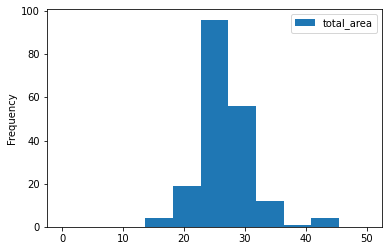

In [3]:
# Посчитаем усреднённые показателя для квартир с разным кол-во комнат.
data['room_area']=data['total_area']/data['rooms']
data['price_for_1_room']=data['last_price']/data['rooms']
data['price_for_1_m']=data['last_price']/data['total_area']
data_rooms=data.pivot_table(index='rooms', values=['price_for_1_room','room_area','price_for_1_m'],aggfunc='median')
print(data_rooms)
# Квартиры с нулем комнат: 
data_0_room=data.loc[data['rooms']==0]
data_0_room.plot(y='total_area',kind='hist', bins=11,range=(0,50)) 
# Площадь квартиры схожа с площадью однокомнатных квартир
data.loc[data['rooms']==0,'rooms']=1

# Посчитаем усреднённые показателя для квартир 
data['room_area']=data['total_area']/data['rooms']
data['price_for_1_room']=data['last_price']/data['rooms']
data['price_for_1_m']=data['last_price']/data['total_area']
data_rooms=data.pivot_table(index='rooms', values=['price_for_1_room','room_area','price_for_1_m'],aggfunc='median')
print(data_rooms)
# Убираем явный выброс в 12 комнатной квартире:
data=data.query('rooms!=12')

In [4]:
# Уберем пропуски в полях living_area и kitchen_area через поиск медианного значения для квартир с разным кол-вом комнат. 


data['living_area_%']=data['living_area']/data['total_area']
data['kitchen_area_%']=data['kitchen_area']/data['total_area']
print('Найдено незаполненных полей living_area',len(data.loc[data['living_area'].isna()]))

try:
    
    data_rooms=(data.loc[~data['living_area'].isna()]).pivot_table(index='rooms', values='living_area_%',aggfunc='median')
    data_rooms=data_rooms.rename(columns={"living_area_%": "median_living_area_%"})
    data=data.join(data_rooms,on='rooms')

    data.loc[data['living_area'].isna(),'living_area']=data['median_living_area_%']
    print('Осталось незаполненных полей living_area',len(data.loc[data['living_area'].isna()]))
    
except:
    print('пропуски полей living_area уже заполнены ')
    
    
print('Найдено незаполненных полей kitchen_area',len(data.loc[data['kitchen_area'].isna()]))

try:
    
    data_rooms=(data.loc[~data['kitchen_area'].isna()]).pivot_table(index='rooms', values='kitchen_area_%',aggfunc='median')
    data_rooms=data_rooms.rename(columns={"kitchen_area_%": "median_kitchen_area_%"})
    data=data.join(data_rooms,on='rooms')

    data.loc[data['kitchen_area'].isna(),'kitchen_area']=data['median_kitchen_area_%']
    print('Осталось незаполненных полей kitchen_area',len(data.loc[data['kitchen_area'].isna()]))
    
except:
    print('пропуски полей kitchen_area уже заполнены ')
     
    

Найдено незаполненных полей living_area 1903
Осталось незаполненных полей living_area 0
Найдено незаполненных полей kitchen_area 2278
Осталось незаполненных полей kitchen_area 0


In [5]:
# Попытка найти ближайшие парки в столбцу parks_around3000
data_parks=data.loc[data['parks_around3000'].isna()]
data_parks=data_parks.loc[~data_parks['parks_nearest'].isna()]
print(len(data_parks))
# Заменим пустоту на 0 в столбце parks_around3000 парков и прудов.  
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

0


In [6]:
data.drop(['living_area_%', 'kitchen_area_%','median_living_area_%','median_kitchen_area_%'], axis = 1, inplace = True)

Все остальные столбцы считаю допустимым оставить неполностью заполненными.  


# 2. Изменение типа данных

Необходимо исправить тип столбцов:
    first_day_exposition-date
    floors_total-integer
    is_apartment-bool
    balcony-integer
    locality_name-str
    ponds_around3000-integer
    ponds_around3000-integer


In [7]:
#Изменение типа данных
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'])
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['is_apartment']=data['is_apartment'].astype('bool')
data['balcony']=data['balcony'].astype('int')
#data['days_exposition']=data['days_exposition'].astype('int')

data['locality_name']=data['locality_name'].astype('str')
#data['floors_total']=data['floors_total'].astype('int',errors='raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  float64       
 2   total_area            23698 non-null  float64       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        14503 non-null  float64       
 6   floors_total          23612 non-null  float64       
 7   living_area           23698 non-null  float64       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  bool          
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          23698 non-null  float64       
 13  balcony         

# 3. Расчет дополнительных показателей

In [8]:
# Расчет день недели, месяц и год публикации объявления
data['dow']=data['first_day_exposition'].dt.dayofweek
data['f_month']=data['first_day_exposition'].dt.month
data['f_year']=data['first_day_exposition'].dt.year
# Категоризация по этажам
def floor_type(floor,floors_total):
    if floor==1:
        return'первый'
    if floor==2:
        return'последний'
    else:
        return'другой'
data['floor_type']=data.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis=1)     
#Доли жилой и кухонной площади
data['living_area_%']=data['living_area']/data['total_area']
data['kitchen_area_%']=data['kitchen_area']/data['total_area']
data.head(100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,room_area,price_for_1_room,price_for_1_m,dow,f_month,f_year,floor_type,living_area_%,kitchen_area_%
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,...,NaN,36.00,4333333.33,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,NaN,11.00,18.60,1,True,...,81.00,40.40,3350000.00,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,NaN,5.00,34.30,4,True,...,558.00,28.00,2598000.00,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000.00,159.00,2015-07-24,3,NaN,14.00,0.63,9,True,...,424.00,53.00,21633333.33,408176.10,4,7,2015,другой,0.00,0.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,...,121.00,50.00,5000000.00,100000.00,1,6,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,5150000.00,47.00,2018-08-06,2,2.75,9.00,28.10,9,False,...,34.00,23.50,2575000.00,109574.47,0,8,2018,другой,0.60,0.15
96,20,8780000.00,78.30,2018-08-24,3,2.50,15.00,51.00,9,True,...,31.00,26.10,2926666.67,112132.82,4,8,2018,другой,0.65,0.14
97,15,4898000.00,146.00,2019-02-12,4,NaN,2.00,77.00,2,True,...,34.00,36.50,1224500.00,33547.95,1,2,2019,последний,0.53,0.09
98,11,11700000.00,80.00,2014-12-10,3,NaN,5.00,55.10,3,True,...,831.00,26.67,3900000.00,146250.00,2,12,2014,другой,0.69,0.14


# 4. Исследовательский анализ данных  
   ## Гистограммы параметров:
    площадь
    цена
    число комнат
    высота потолков

<function matplotlib.pyplot.show(close=None, block=None)>

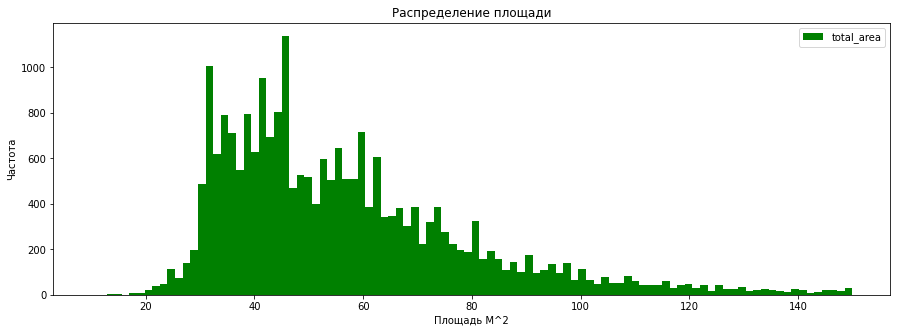

In [9]:

data.plot(y='total_area' ,kind='hist',bins=100,range=(10,150),figsize=(15,5),color = "green",
      xlabel='площадь объектов')
plt.title('Распределение площади')
plt.ylabel('Частота')
plt.xlabel('Площадь M^2')
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

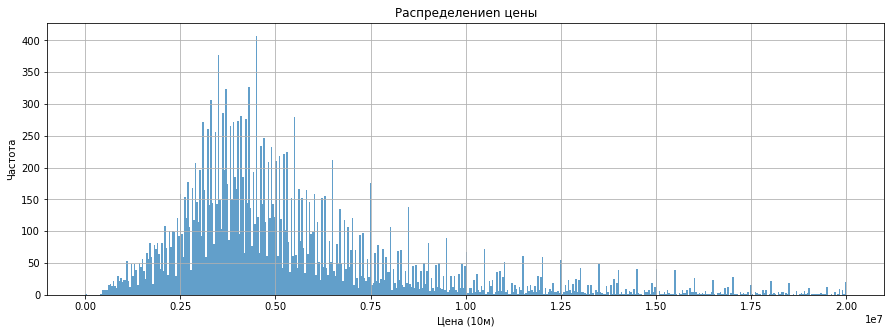

In [10]:
#print(data['last_price'].value_counts())
data['last_price'].hist(bins=500,range=(0,20000000),figsize=(15,5),alpha=0.7)
plt.title('Распределениеn цены')
plt.ylabel('Частота')
plt.xlabel('Цена (10м)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

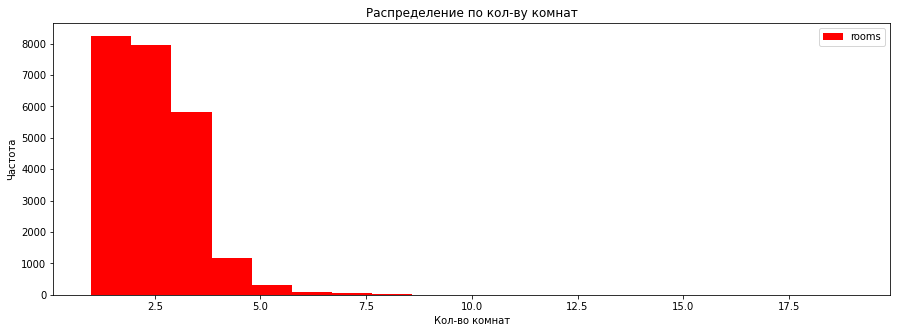

In [11]:
data.plot(y='rooms',kind='hist',figsize=(15,5),bins=19,title='Распределение по комнатам',color = "red")
plt.title('Распределение по кол-ву комнат')
plt.ylabel('Частота')
plt.xlabel('Кол-во комнат')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

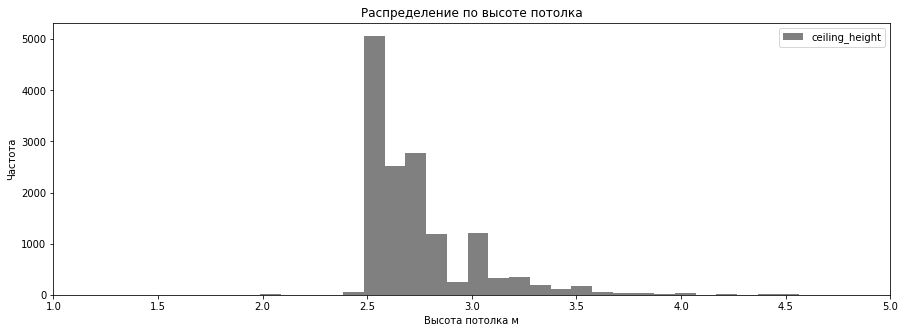

In [12]:
data.plot(y='ceiling_height',kind='hist',xlim=(1,5),figsize=(15,5),bins=1000,color = "grey")
plt.title('Распределение по высоте потолка')
plt.ylabel('Частота')
plt.xlabel('Высота потолка м')
plt.show

## Время продажи квартиры

Среднее время продажи квартиры: 180.89228444704392
Медианное время продажи квартиры: 95.0
45.00    880
60.00    538
7.00     234
30.00    208
90.00    204
4.00     176
3.00     158
5.00     152
14.00    148
9.00     143
Name: days_exposition, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

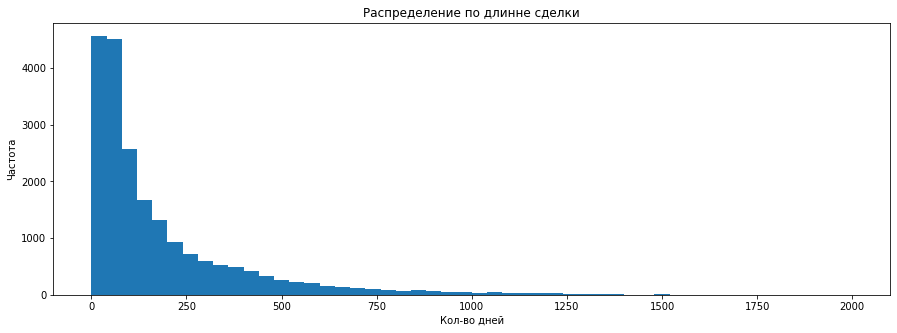

In [13]:

print('Среднее время продажи квартиры:',data['days_exposition'].mean())
print('Медианное время продажи квартиры:',data['days_exposition'].median())
data1=data['days_exposition'].dropna()


data1.plot(y='days_exposition',kind='hist',figsize=(15,5),bins=50,range=(0,2000))
print(data['days_exposition'].value_counts().head(10))
plt.title('Распределение по длинне сделки')
plt.ylabel('Частота')
plt.xlabel('Кол-во дней')
plt.show

Обычное время продажи хорошо описывает медианное значение 180 дней. Быстрыми можно считать сделки короче 90 дней. Аномально длинными от 1000 дней.  
При точечном рассмотрение видно несколько искусственных значений  days_exposition in (7,30,45,60,90) возможно эти выброс связаны с автоматическим, техническим снятием объявления а не продажей квартиры.

## Факторы влияющие на стоимость квартиры

In [14]:
data=data.query('last_price<=20000000')
data=data.query('rooms<=10')
data=data.query('total_area<=150')
data=data.query('price_for_1_m>=50000')  
print(data['ceiling_height'].mean())
print(data['ceiling_height'].median())

data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)
data=data.query('ceiling_height<=5')  
data=data.query('ceiling_height>2')  
data.info()

2.7572991400015496
2.65
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20952 entries, 0 to 23697
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20952 non-null  int64         
 1   last_price            20952 non-null  float64       
 2   total_area            20952 non-null  float64       
 3   first_day_exposition  20952 non-null  datetime64[ns]
 4   rooms                 20952 non-null  int64         
 5   ceiling_height        20952 non-null  float64       
 6   floors_total          20870 non-null  float64       
 7   living_area           20952 non-null  float64       
 8   floor                 20952 non-null  int64         
 9   is_apartment          20952 non-null  bool          
 10  studio                20952 non-null  bool          
 11  open_plan             20952 non-null  bool          
 12  kitchen_area          20952 non-null  float64     

0.7995010118905372
-0.35775180026237163


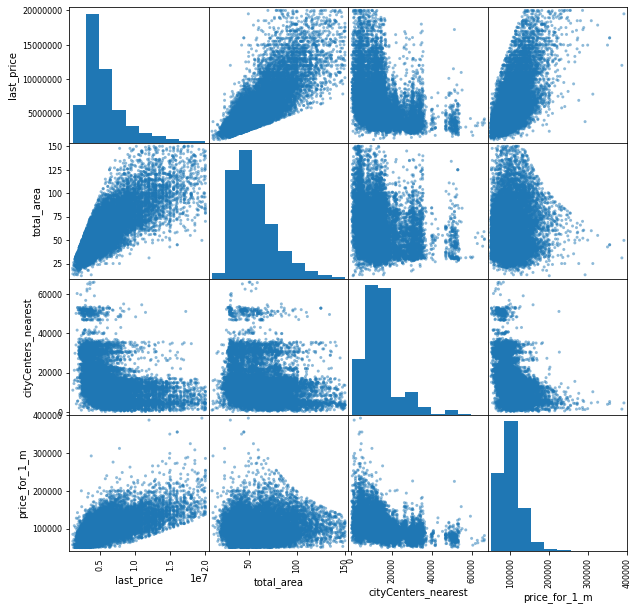

In [15]:
data_small=data[['last_price','total_area','cityCenters_nearest','price_for_1_m']]
pd.plotting.scatter_matrix(data_small, figsize=(10, 10)) 
print(data_small['last_price'].corr(data_small['total_area']))

print(data_small['last_price'].corr(data_small['cityCenters_nearest']))


Зависимость цены от площади имеет хорошо выраженную прямую корреляцию.
Расстояние от центра имеет обратную корреляцию, но слабую. Цена сильно зависит в объявлениях близких к центру, далее зависимость хуже прослеживается.  

1    7800
2    7057
3    5016
4     890
5     160
6      23
7       5
8       1
Name: rooms, dtype: int64


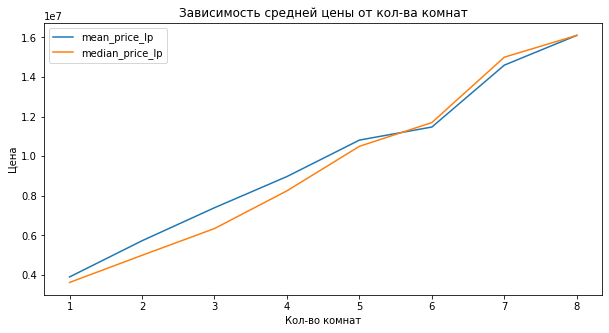

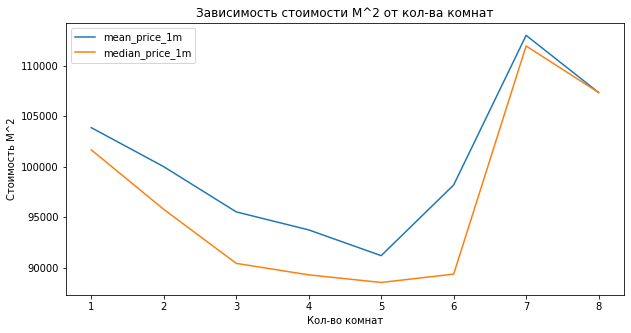

In [16]:
data_rooms=data.pivot_table(index='rooms', values=['last_price','price_for_1_m'],aggfunc=['mean','median'])

data_rooms.columns = ['mean_price_lp','mean_price_1m', 'median_price_lp', 'median_price_1m'] 

data_rooms.plot(y=['mean_price_lp', 'median_price_lp'] ,kind='line',figsize=(10,5))
plt.title('Зависимость средней цены от кол-ва комнат')
plt.ylabel('Цена')
plt.xlabel('Кол-во комнат')
plt.show
data_rooms.plot(y=['mean_price_1m', 'median_price_1m'] ,kind='line',figsize=(10,5))
plt.title('Зависимость стоимости M^2 от кол-ва комнат')
plt.ylabel('Стоимость M^2')
plt.xlabel('Кол-во комнат')
plt.show

print(data['rooms'].value_counts())


<div style="color:blue">
Стоимость линейно возрастает относить количества комнат. Это косвенно доказывает отсутствие выбросов
при этом стоимость квадратного метра снижается от 1 комнаты до 5 комнат. Но после резко повышается. Скорей всего это связано с тем, что на рынке довольно мало предложений больше 5 квартир и они уже относятся к группе элитного жилья. 


In [17]:
data_floors=data.pivot_table(index='floor_type',values='price_for_1_m',aggfunc=['median','mean'])
print(data_floors)



                  median          mean
           price_for_1_m price_for_1_m
floor_type                            
другой          98630.92     102028.06
первый          85571.43      89014.42
последний       94907.41      98151.62


Первые и Последние этажи в среднем стоят дешевле других 

(0.0, 6.0, 4000000.0, 6000000.0)

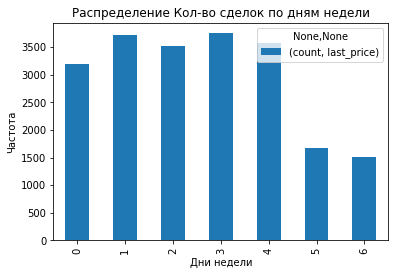

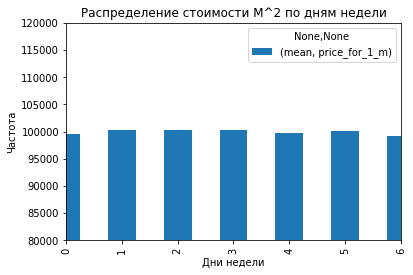

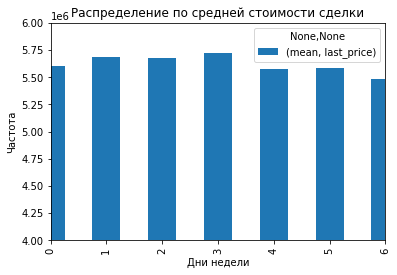

In [18]:
data_small=data[['last_price','price_for_1_m','dow','f_month','f_year']]

data_small_p=data_small.pivot_table(index='dow',values='last_price',aggfunc=['count'])
data_small_p.plot(kind='bar')
plt.title('Распределение Кол-во сделок по дням недели')
plt.ylabel('Частота')
plt.xlabel('Дни недели')

data_small_p=data_small.pivot_table(index='dow',values='price_for_1_m',aggfunc=['mean'])
data_small_p.plot(kind='bar')
plt.title('Распределение стоимости M^2 по дням недели')
plt.ylabel('Частота')
plt.xlabel('Дни недели')
plt.axis((0,6,80000,120000))

data_small_p=data_small.pivot_table(index='dow',values='last_price',aggfunc=['mean'])
data_small_p.plot(kind='bar')
plt.title('Распределение по средней стоимости сделки')
plt.ylabel('Частота')
plt.xlabel('Дни недели')
plt.axis((0,6,4000000,6000000))

Наиболее активные дни для сделок Вторник, Четверг, Пятница. Сделок в выходные в 2 раза меньше.
<div style="color:blue"> 
<s>Наибольшая стоимость сделок Вторник-Четверг</s> 

<div style="color:green">  
Стоимость сделок по дням выровнялась. Пердыдущее утверждение не верное.    

<function matplotlib.pyplot.show(close=None, block=None)>

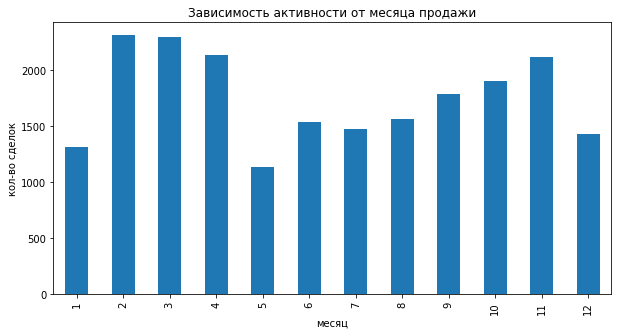

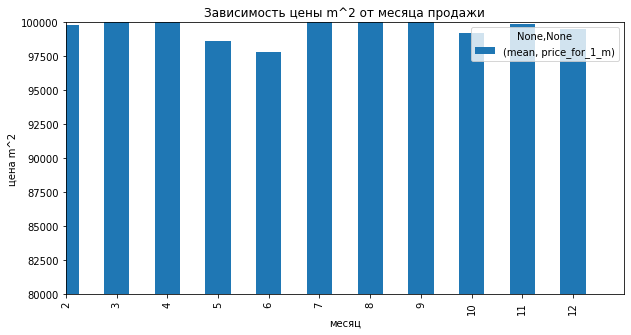

In [19]:
data_small=data[['last_price','price_for_1_m','dow','f_month','f_year']]
data_small_m=data_small.groupby('f_month').last_price.count()
data_small_m.plot(kind='bar',figsize=(10,5))
plt.title('Зависимость активности от месяца продажи')
plt.ylabel('кол-во сделок')
plt.xlabel('месяц')

data_small_m=data_small.pivot_table(index='f_month',values='price_for_1_m',aggfunc=['mean'] )
data_small_m.plot(kind='bar',figsize=(10,5))
plt.title('Зависимость цены m^2 от месяца продажи')
plt.ylabel('цена m^2')
plt.xlabel('месяц')
plt.axis((1,12,80000,100000))
plt.show


Наиболее активный период продажи квартир — это весна и осень.
<div style="color:blue"> 
Стоимость за квадратный метр имеет минимум в июне и декабре.

2018    7493
2017    7306
2019    2548
2016    2465
2015    1035
2014     105
Name: f_year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

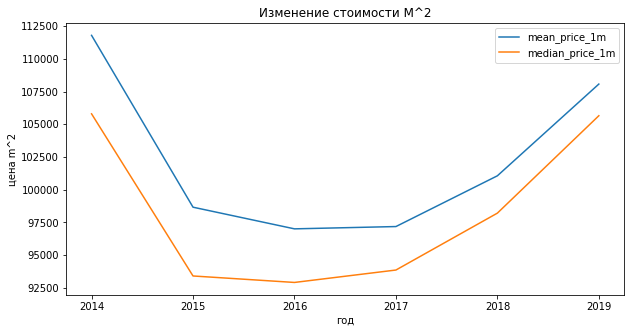

In [20]:
data_small=data[['last_price','price_for_1_m','dow','f_month','f_year']]

print(data_small['f_year'].value_counts())



data_small_y=data_small.pivot_table(index='f_year', values='price_for_1_m',aggfunc=['mean','median'])


data_small_y.columns = ['mean_price_1m', 'median_price_1m'] 


data_small_y.plot(y=['mean_price_1m', 'median_price_1m'] ,kind='line',figsize=(10,5))
plt.title('Изменение стоимости M^2')
plt.ylabel('цена m^2')
plt.xlabel('год')
plt.show


Снижение средней стоимости квадратного метра с 14 по 18 год. 19 год обусловлен ростом.

## Выборка ТОП-10 населённых пунктов

Максимальная цена за квМ в топ-10 городах price_for_1_m   108975.50
dtype: float64
Минимальная цена за квМ в топ-10 городах price_for_1_m   68567.07
dtype: float64


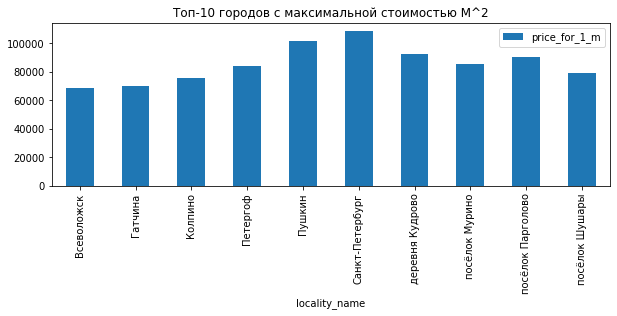

In [21]:
data_10_list=data['locality_name'].value_counts().head(10).index.tolist()

data_10=data.loc[data['locality_name'].isin(data_10_list)]
data_10_p=data_10.pivot_table(index='locality_name', values='price_for_1_m', aggfunc='mean' ) 
data_10_p.plot(kind='bar',figsize=(10,3))
plt.title('Топ-10 городов с максимальной стоимостью M^2')
print('Максимальная цена за квМ в топ-10 городах',data_10_p.max())
print('Минимальная цена за квМ в топ-10 городах',data_10_p.min())

## Квартиры Санкт-Петербурга

Text(0.5, 0, 'км')

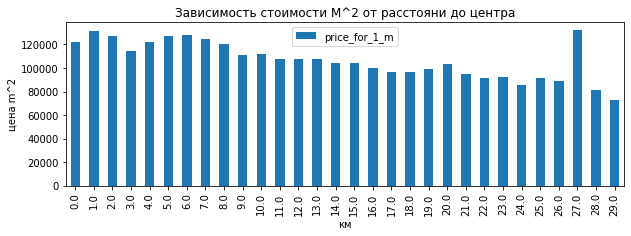

In [22]:
data_spb=data.loc[data['locality_name']=='Санкт-Петербург']
data_spb=data_spb.dropna(subset=['cityCenters_nearest'])
data_spb=data_spb[['locality_name','cityCenters_nearest','last_price','price_for_1_m','floor','total_area','rooms','room_area','ceiling_height','first_day_exposition']]
data_spb['cityCenters_nearest_m']=data_spb['cityCenters_nearest']/1000
data_spb['cityCenters_nearest_m']=data_spb.cityCenters_nearest_m.round(0)

data_spb_p=data_spb.pivot_table(index='cityCenters_nearest_m', values='price_for_1_m', aggfunc='mean' ) 

data_spb_p.plot(kind='bar',figsize=(10,3))
plt.title('Зависимость стоимости M^2 от расстояни до центра')
plt.ylabel('цена m^2')
plt.xlabel('км')



Центральной зоной можно назвать объекты недвижимости в радиусе 7 км. 
<div style="color:blue"> 
<s>Убрал выброс на 27 км. </s>    

In [23]:
data_spb=data.loc[data['locality_name']=='Санкт-Петербург']
data_spb=data_spb.dropna(subset=['cityCenters_nearest'])
data_spb=data_spb[['locality_name','cityCenters_nearest','last_price','price_for_1_m','floor','total_area','room_area','rooms','ceiling_height','first_day_exposition']]
data_spb['cityCenters_nearest_m']=data_spb['cityCenters_nearest']/1000
data_spb['cityCenters_nearest_m']=data_spb.cityCenters_nearest_m.round(0)
data_spb=data_spb.query('cityCenters_nearest!=27313.00') 


data_spb7=data_spb.query('cityCenters_nearest_m<=7')
data_spb_without7=data_spb.query('cityCenters_nearest_m>7')

Средняя площадь в центре 73.69306322039819
Средняя площадь не центра 54.473847444826724
Средняя площадь общая 58.19675778078485
1.3528154642470858


(0.0, 400000.0, 0.0, 140.0)

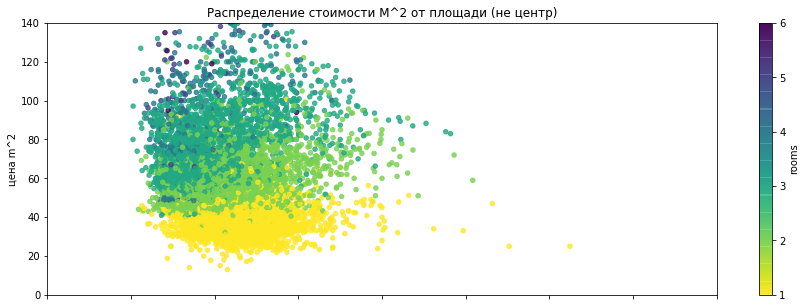

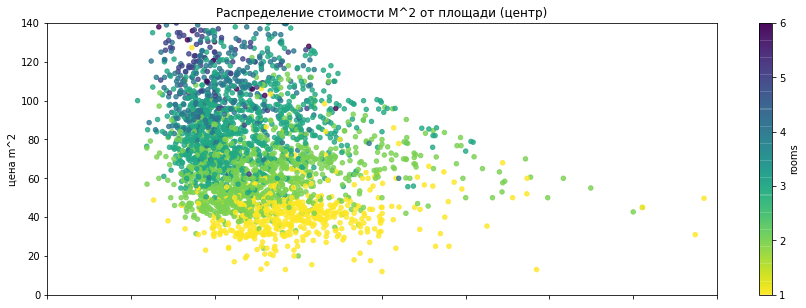

In [24]:
# Зависимость от площади. 
print('Средняя площадь в центре', data_spb7['total_area'].mean())
print('Средняя площадь не центра', data_spb_without7['total_area'].mean())
print( 'Средняя площадь общая',data_spb['total_area'].mean())
print (data_spb7['total_area'].mean()/data_spb_without7['total_area'].mean())
#data_spb=data_spb.pivot_table(index='total_area', values='price_for_1_m', aggfunc='mean' ) 

data_spb_without7.plot(y='total_area', x='price_for_1_m',c='rooms', 
                       kind='scatter',figsize=(15,5),cmap='viridis_r',alpha=0.8)
plt.title('Распределение стоимости M^2 от площади (не центр)')
plt.ylabel('цена m^2')
plt.axis((0,400000,0,140))


data_spb7=data_spb7.query('rooms<=6')

data_spb7.plot(y='total_area', x='price_for_1_m',c='rooms',
               kind='scatter',figsize=(15,5),cmap='viridis_r',alpha=0.8)
plt.title('Распределение стоимости M^2 от площади (центр)')
plt.ylabel('цена m^2')
plt.axis((0,400000,0,140))


**Вывод по площади:** Средняя площадь квартир в центре на 35% больше остальных предложений.
Так же мы видим, что в центре гораздо больше разброс стоимости квадратного метра. Есть явный "шлейф" в дорогом сегменте. 
Предложения по 7 и 8 комнатным квартирам существуют только в центре. (Убираю из графиков, чтобы синхронизировать цвета)
Вне центра больше сегмент квартир 1-2 комнаты до 60 кв.м

При обработке данных убраны значения менее 50000 за кв.м (считаю  их выбросами) 


Text(0, 0.5, 'площадь комнаты m^2')

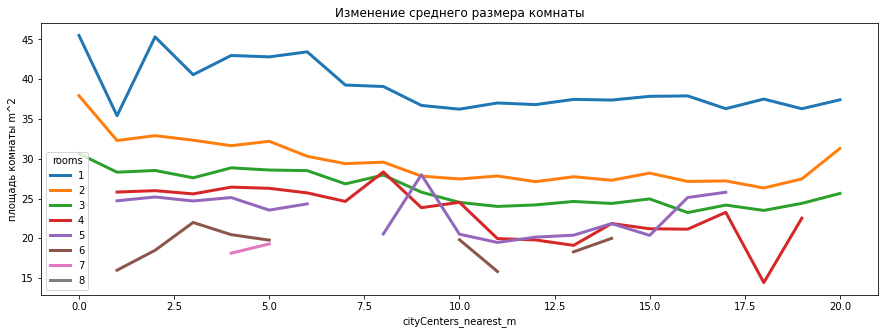

In [25]:
#Зависимость от размера комнаты от удаленности

data_spb_1=data_spb.pivot_table(index='cityCenters_nearest_m',columns='rooms', values='room_area', aggfunc='mean') 
data_spb_1=data_spb_1.query('cityCenters_nearest_m<=20')

data_spb_1.plot(kind='line', linewidth=3.0, figsize=(15,5))
plt.title('Изменение среднего размера комнаты')
plt.ylabel('площадь комнаты m^2')


**Вывод:** Хорошо видно что размерность комнат снижается и есть граница 7-8 км для 1,2,3 комнатных  квартир. подтверждающая границу центра.

Средняя высота потолка в центре 2.905526776338817
Средняя высота потолка вне центра 2.657143576403457
Средня высота потолка 2.7052598105548036
1.0934775230593883


Text(0, 0.5, 'цена m^2')

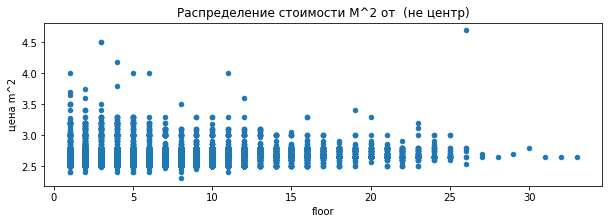

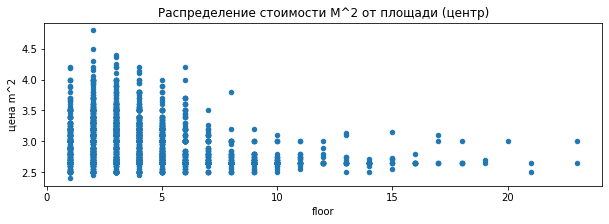

In [26]:
# Зависимость от этажа и высоты потолков. 
#print(data_spb7.head())
print('Средняя высота потолка в центре', data_spb7['ceiling_height'].mean())
print('Средняя высота потолка вне центра', data_spb_without7['ceiling_height'].mean())
print( 'Средня высота потолка',data_spb['ceiling_height'].mean())
print (data_spb7['ceiling_height'].mean()/data_spb_without7['ceiling_height'].mean())
#data_spb=data_spb.pivot_table(index='total_area', values='price_for_1_m', aggfunc='mean' ) 

data_spb_without7.plot(y='ceiling_height', x='floor', kind='scatter',figsize=(10,3))
plt.title('Распределение стоимости M^2 от  (не центр)')
plt.ylabel('цена m^2')
#plt.axis((0,400000,0,140))

#data_spb7=data_spb7.pivot_table(index='total_area', values='price_for_1_m', aggfunc='mean'  ) 

data_spb7.plot(y='ceiling_height', x='floor',kind='scatter',figsize=(10,3))
plt.title('Распределение стоимости M^2 от площади (центр)')
plt.ylabel('цена m^2')
#plt.axis((0,400000,0,140))


**Вывод:** В центре преобладают предложения в низко этажном секторе (до 5 этажей) но с высокими потолками (сред. Знач. 3 м). Вне центра распределение по этажам более равномерное (типовая застройка) и высота потолков стабильно до 3 м. (сред  2,6м)
 Из выборки убрал объекты с некорректной высотой (менее 2 м и более 5 метров)


<AxesSubplot:xlabel='first_day_exposition', ylabel='price_for_1_m'>

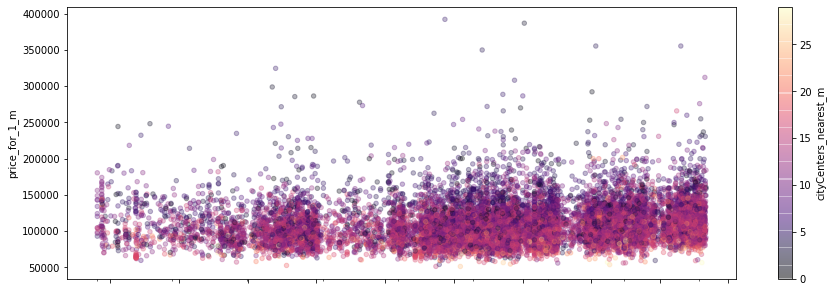

In [27]:
# Зависимость от даты



data_spb.plot(y='price_for_1_m',x='first_day_exposition', kind='scatter',c='cityCenters_nearest_m',alpha=0.3,cmap='magma', figsize=(15,5))



Зависимости от  даты публикации не наблюдается.

In [28]:
print('Средняя стоимость M^2 в центре', data_spb7['price_for_1_m'].mean())
print('Средняя стоимость  M^2 вне центра', data_spb_without7['price_for_1_m'].mean())
print('Средняя стоимость  M^2',data_spb['price_for_1_m'].mean())
print (data_spb7['price_for_1_m'].mean()/data_spb_without7['price_for_1_m'].mean())

Средняя стоимость M^2 в центре 124934.16807854189
Средняя стоимость  M^2 вне центра 105077.76297903642
Средняя стоимость  M^2 108918.87088571391
1.1889686698361377


Хорошо заметна разница средней стоимости квадратного метра. 

In [29]:

print(data_spb7['price_for_1_m'].corr(data_spb7['total_area']))
print(data_spb_without7['price_for_1_m'].corr(data_spb_without7['total_area']))
print(data_spb['price_for_1_m'].corr(data_spb['total_area']))

-0.2724947766587953
0.0024446740813118773
0.010646730762463233


Вывод: Обратная зависимость стоимости метра от площади обнаруживается только в центре.    

Сохраняются общие тенденции распределения. Чем ближе к центру, тем больше размер квартиры и стоимость квадратного метра также увеличивается. 


Рассматриваемый массив данных дает представление о распределение стоимости недвижимости по ключевым показателям. Можно сказать, что количество предложений в городе СП гораздо больше, чем в других городах, так же СП сохраняет за собой лидирующую позицию по стоимости квадратного метра.

**Параметры для проверки:**

    1) Потолки: больше 2 меньше 5
    2) Стоимость квадратного метра от 50 000р
    3) Общая площадь в пределах  150 кв.м
    4) Кол-во комнат не более 10
    5) Стоимость квадратного метра в пределах 200 000 р 
   
